In [20]:
import matplotlib.pyplot as plt
from matplotlib import style
import numpy as np
style.use('ggplot')


In [21]:
#Support Machine Class
class Support_Vector_Machine:
    def __init__(self, visualization=True) -> None:
        self.visualization = visualization
        self.colors = {1:'r',-1:'b'}
        if self.visualization:
            self.fig = plt.figure()
            self.ax = self.fig.add_subplot(1,1,1)
    #Train
    def fit(self, data):
        self.data = data
        # {||w||: [w,b]}
        opt_dict = {}
        
        transforms = [[1,1],
                     [-1,1],
                     [-1,-1],
                     [1,-1]]

        all_data = []
        for yi in self.data:
            for featureset in self.data[yi]:
                for feature in featureset:
                    all_data.append(feature)
        self.max_feature_value = max(all_data)
        self.min_feature_value = min(all_data)
        all_data = None


        step_sizes = [self.max_feature_value * 0.1,
                      self.max_feature_value * 0.01,
                      #point of expense:
                      self.max_feature_value * 0.001]
        # extremely expensive
        b_range_multiple = 5

        
        b_multiple = 5

        latest_optimum = self.max_feature_value*10

        for step in step_sizes:
            w = np.array([latest_optimum,latest_optimum])
            optimized = False
            while not optimized:                
                for b in np.arange(-1*(self.max_feature_value*b_range_multiple), 
                                   self.max_feature_value*b_range_multiple, 
                                   step*b_multiple):
                    for transformation in transforms:
                        w_t = w*transformation
                        found_option = True
                        # weakest link in the SVM fundamentally
                        # SMO attempts to fix this a bit
                        #yi(xi.w+b) >= 1
                        for i in self.data:
                            for xi in self.data[i]:
                                yi=i
                                if not yi*(np.dot(w_t,xi)+b) >=1:
                                    found_option = False
                                #print(xi,":"yi*(np.dot(w_t,xi)+b))
                        if found_option:
                            opt_dict[np.linalg.norm(w_t)] = [w_t, b]
                if w[0] < 0:
                    optimized = True
                    print('Optimized a step.')
                else:
                    # w = [5,5]
                    # step = 1
                    # W - step = [4,4]
                    w = w - step
            norms = sorted([n for n in opt_dict])
            # ||w|| : [w,b]
            opt_choice = opt_dict[norms[0]]
            self.w = opt_choice[0]
            self.b = opt_choice[1]
            latest_optimum = opt_choice[0][0] + step*2
        
        for i in self.data:
            for xi in self.data[i]:
                yi=i
                print(xi,":",yi*(np.dot(self.w,xi)+self.b))            

    def predict (self,features):
        #sign (x.w+b)
        classification = np.sign(np.dot(np.array(features), self.w)+self.b)
        if classification != 0 and self.visualization:
            self.ax.scatter(features[0], features[1], s=200, marker='*', c= self.colors[classification])
        return classification
    def visualize(self):
        [[self.ax.scatter(x[0], x[1], s=100, color=self.colors[i]) for x in data_dict[i]]for i in data_dict]
        # hyperplane = x.w+b
        # v = x.w+b
        # psv = 1
        # nsv = -1
        # dec = 0
        def hyperplane(x,w,b,v):
            return (-w[0]*x-b+v) / w[1]
        
        datarange = (self.min_feature_value*0.9, self.max_feature_value*1.1)
        hyp_x_min = datarange[0]
        hyp_x_max = datarange[1]

        # (w.x+b) = 1
        # positive support vector hyperplane
        psv1 = hyperplane(hyp_x_min, self.w, self.b, 1)
        psv2 = hyperplane(hyp_x_max, self.w, self.b, 1)
        self.ax.plot([hyp_x_min, hyp_x_max],[psv1,psv2],'k')

        # (w.x+b) = -1
        # negative support vector hyperplane
        nsv1 = hyperplane(hyp_x_min, self.w, self.b, -1)
        nsv2 = hyperplane(hyp_x_max, self.w, self.b, -1)
        self.ax.plot([hyp_x_min, hyp_x_max],[nsv1,nsv2],'k')

        # (w.x+b) = 0
        # boundary support vector hyperplane
        db1 = hyperplane(hyp_x_min, self.w, self.b, 0)
        db2 = hyperplane(hyp_x_max, self.w, self.b, 0)
        self.ax.plot([hyp_x_min, hyp_x_max],[db1,db2],'y--')

        plt.show()


In [22]:
data_dict = {-1:np.array([[1,7],
                          [2,8],
                          [3,8]]),
             1:np.array([[5,1],
                         [6,-1],
                         [7,3]])}

Optimized a step.
Optimized a step.
Optimized a step.
[1 7] : 1.2239999999999465
[2 8] : 1.2239999999999465
[3 8] : 1.000000000000098
[5 1] : 1.015999999998539
[ 6 -1] : 1.6879999999980846
[7 3] : 1.015999999998539


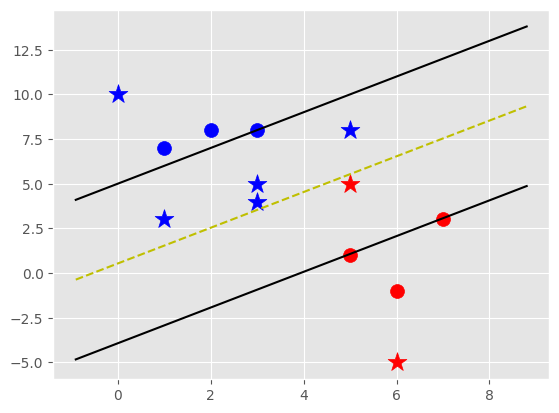

In [23]:
svm = Support_Vector_Machine()
svm.fit(data=data_dict)
predict_us=[[0,10],
            [1,3],
            [3,4],
            [3,5],
            [5,5],
            [6,-5],
            [5,8]]
for p in predict_us:
    svm.predict(p)
svm.visualize()